In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

In [2]:
import numpy as np

In [3]:
dataset = datasets.load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, random_state = 0, test_size = 0.2)
print(X_train)
print(X_test)
print(Y_train)

[[1.005e+01 1.753e+01 6.441e+01 ... 6.499e-02 2.894e-01 7.664e-02]
 [1.080e+01 2.198e+01 6.879e+01 ... 7.485e-02 2.965e-01 7.662e-02]
 [1.614e+01 1.486e+01 1.043e+02 ... 1.129e-01 2.778e-01 7.012e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]
[[1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.321e+01 2.525e+01 8.410e+01 ... 6.005e-02 2.444e-01 6.788e-02]
 [1.402e+01 1.566e+01 8.959e+01 ... 8.216e-02 2.136e-01 6.710e-02]
 ...
 [2.018e+01 1.954e+01 1.338e+02 ... 2.173e-01 3.032e-01 8.075e-02]
 [1.831e+01 2.058e+01 1.208e+02 ... 1.510e-01 3.074e-01 7.863e-02]
 [1.504e+01 1.674e+01 9.873e+01 ... 1.018e-01 2.177e-01 8.549e-02]]
[1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0

In [4]:
# In KNN the train function has nothing to do
def train(X_train, Y_train):
    return

In [5]:
#Row wise processing of the training data
def predict_one(X_train, Y_train, X_test, k):
    distances = []
    for i in range(len(X_train)):
        distance = ((X_train[i, :] - X_test)**2).sum()
        distances.append([distance, i])
    distances = sorted(distances) # The distances array is sorted according to the first element i.e distance
    targets = []
    for i in range(k):
        index_of_training_data = distances[i][1]
        targets.append(Y_train[index_of_training_data])
    return Counter(targets).most_common(1)[0][0] #The use of counters to find the dominating class

In [6]:
#The predict function for KNN 
def predict(X_train, Y_train, X_test_data, k):
    predictions = []
    for X_test in X_test_data:
        predictions.append(predict_one(X_train, Y_train, X_test, k))
    return predictions

Accuracy:  0.9122807017543859 for K =  1
Accuracy:  0.9122807017543859 for K =  3
Accuracy:  0.9385964912280702 for K =  5
Accuracy:  0.9473684210526315 for K =  7
Accuracy:  0.9649122807017544 for K =  9
Accuracy:  0.9649122807017544 for K =  11
Accuracy:  0.9649122807017544 for K =  13
Accuracy:  0.9649122807017544 for K =  15
Accuracy:  0.9649122807017544 for K =  17
Accuracy:  0.9649122807017544 for K =  19
Accuracy:  0.9649122807017544 for K =  21
Accuracy:  0.9649122807017544 for K =  23
Accuracy:  0.9649122807017544 for K =  25


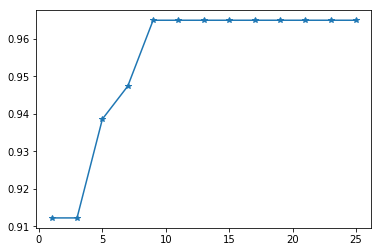

In [10]:
#To find the optimal value of K
x_axis = []
y_axis = []
for i in range(1, 26, 2):
    x_axis.append(i)
    Y_pred = predict(X_train, Y_train, X_test, i)
    y_axis.append(accuracy_score(Y_test, Y_pred))
    print("Accuracy: ", accuracy_score(Y_test, Y_pred), "for K = ", i)
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis, marker = "*")
plt.show()

In [8]:
#from the above cell, we find that the optimal k = 9
Y_pred = predict(X_train, Y_train, X_test, 9)
print(Y_pred)
print("Accuracy = ", accuracy_score(Y_test, Y_pred))

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
Accuracy =  0.9649122807017544


In [9]:
#comparison with the inbuilt sklearn classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 9)
clf.fit(X_train, Y_train)
print("In-Built = ", clf.score(X_test, Y_test))

In-Built =  0.9649122807017544
